# Comparisons, Masks, and Boolean Logic

This section covers the use of Boolean masks to examine and manipulate values within NumPy arrays. Masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion: for example, you might wish to count all values greater than a certain value, or perhaps remove all outliers that are above some threshold. In NumPy, Boolean masking is often the most efficient way to accomplish these types of tasks.

## Example: Counting Rainy Days

Imagine you have a series of data that represents the amount of precipitation each day for a year in a given city. For example, here we'll load the daily rainfall statistics for the city of Seattle in 2014, using Pandas. 

In [3]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0 # 0.1mm -> inches
inches.shape

(365,)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <a list of 40 Patch objects>)

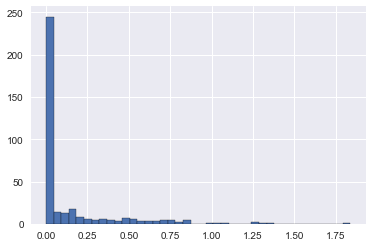

In [12]:
plt.hist(inches, 40, edgecolor='black')

## Comparison Operators as ufuncs

In [13]:
x = np.array([1, 2, 3, 4, 5])

In [14]:
x < 3

array([ True,  True, False, False, False])

In [15]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

In [16]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [17]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

## Working with Boolean Arrays

In each case above, the result is a Boolean array, and NumPy provides a number of straightforward patterns for working with these Boolean results.

In [18]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [19]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

In [20]:
# how many values less than 6 in the whole array?
np.sum(x < 6)

8

In [24]:
# # how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

If we're interested in quickly checking whether any or all the values are true, we can use `np.any` or `np.all`:

In [25]:
# are there any values greater than 8?
np.any(x > 8)

True

In [26]:
# are there any values less than zero?
np.all(x < 10)

True

In [27]:
# All days with rain less than four inches and
# greater than one inch
np.sum((inches > 0.5) & (inches <  1))

29

In [28]:
# Above can also be calculate like this
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

In [29]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


### Now to select these values from the array, we can simply index on this Boolean array; this is known as a masking operation:

In [30]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [38]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)


print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


## Aside: Using the Keywords and/or Versus the Operators &/|

`and` and `or` gauge the truth or falsehood of entire object, while `&` and `|` refer to bits within each object.

In [39]:
bool(42), bool(0)

(True, False)

In [40]:
bool(42 and 0)

False

In [41]:
bool(42 or 0)

True

When you use `&` and `|` on integers, the expression operates on the bits of the element, applying the and or the or to the individual bits making up the number:

In [42]:
bin(42)

'0b101010'

In [43]:
bin(59)

'0b111011'

In [44]:
bin(42 & 59)

'0b101010'

In [45]:
bin(42 | 59)

'0b111011'

In [51]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [49]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Similarly, when doing a Boolean expression on a given array, you should use `|` or `&` rather than `or` or `and`:

In [52]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [53]:
(x >  4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# So remember this: and and or perform a single Boolean evaluation on an entire object, while `&` and `|` perform multiple Boolean evaluations on the content (the individual bits or bytes) of an object.